# Importing libraries

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data

In [2]:
def load_series(data, product, n_lags=12):
    df = data[data['product'] == product].copy()
    df = df.set_index('date').sort_index()
    ts = df['price'].resample('W').mean().interpolate()
    ts = ts.dropna().values.reshape(-1, 1)
    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts)

    X, y = [], []
    for i in range(n_lags, len(ts_scaled)):
        X.append(ts_scaled[i - n_lags:i, 0])
        y.append(ts_scaled[i, 0])

    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Build LSTM model

In [3]:
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Forecast future values

In [4]:
def forecast_lstm(model, last_window, steps, scaler):
    predictions = []
    current_window = last_window.copy()
    for _ in range(steps):
        pred = model.predict(current_window.reshape(1, -1, 1), verbose=0)
        predictions.append(pred[0, 0])
        current_window = np.append(current_window[1:], pred)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Run training for all products

Saved model for Millet as Millet_lstm_model.h5


['Millet_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
Millet: MAPE=1.78%, RMSE=667.45, R^2=-0.38


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Millet')

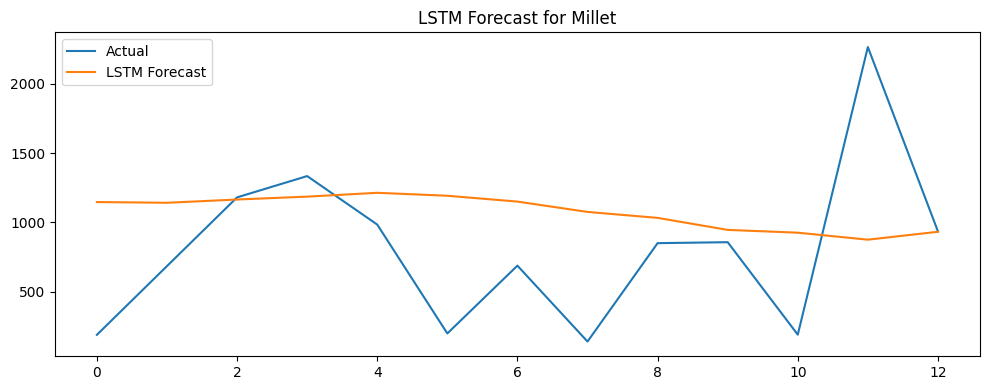

Saved model for Hot pepper as Hot_pepper_lstm_model.h5


['Hot_pepper_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Hot pepper: MAPE=1.11%, RMSE=481.13, R^2=-0.11


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Hot pepper')

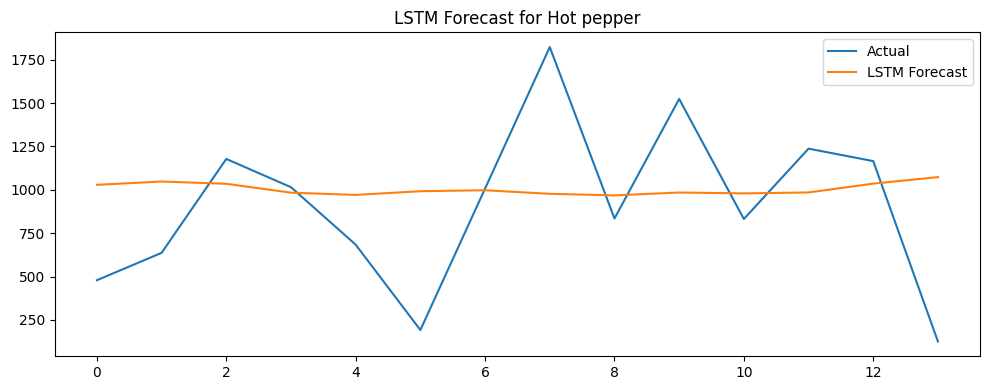

Saved model for Sugar (local) as Sugar_local_lstm_model.h5


['Sugar_local_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Sugar (local): MAPE=1.40%, RMSE=674.69, R^2=-0.08


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Sugar (local)')

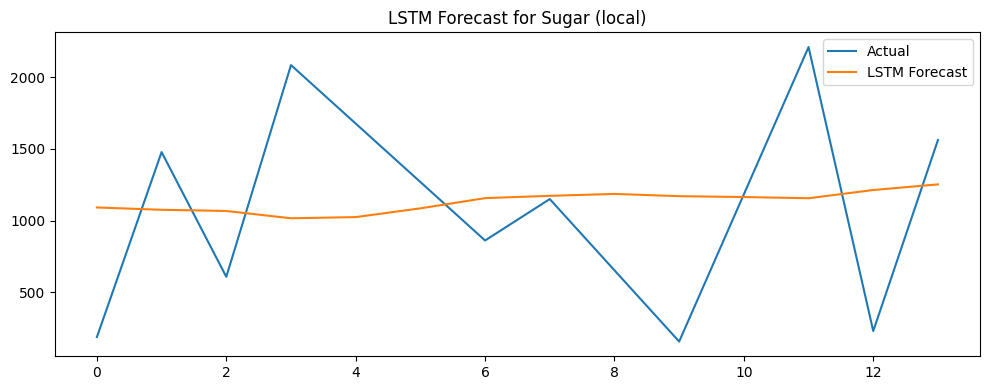

Saved model for Fava beans as Fava_beans_lstm_model.h5


['Fava_beans_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
Fava beans: MAPE=2.00%, RMSE=556.83, R^2=-0.09


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Fava beans')

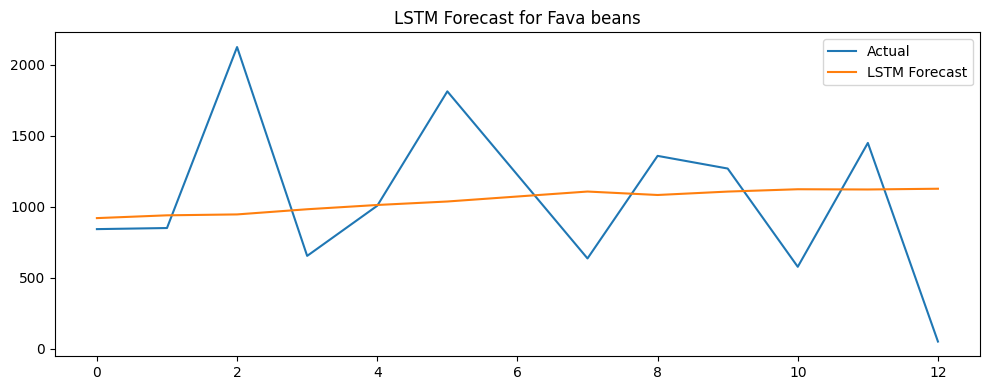

Saved model for Nifro as Nifro_lstm_model.h5


['Nifro_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Nifro: MAPE=2.29%, RMSE=490.62, R^2=-0.20


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Nifro')

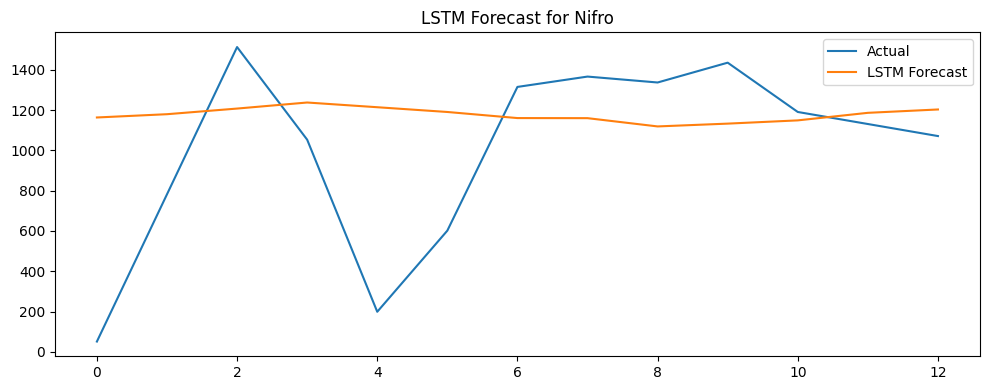

Saved model for Cabbage as Cabbage_lstm_model.h5


['Cabbage_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Cabbage: MAPE=0.67%, RMSE=482.40, R^2=-0.40


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Cabbage')

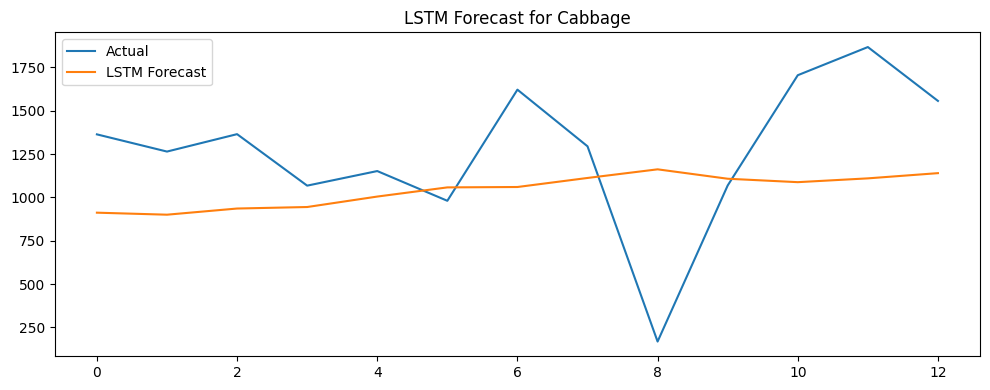

Saved model for Chicken (dressed) as Chicken_dressed_lstm_model.h5


['Chicken_dressed_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Chicken (dressed): MAPE=3.40%, RMSE=695.70, R^2=-0.07


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Chicken (dressed)')

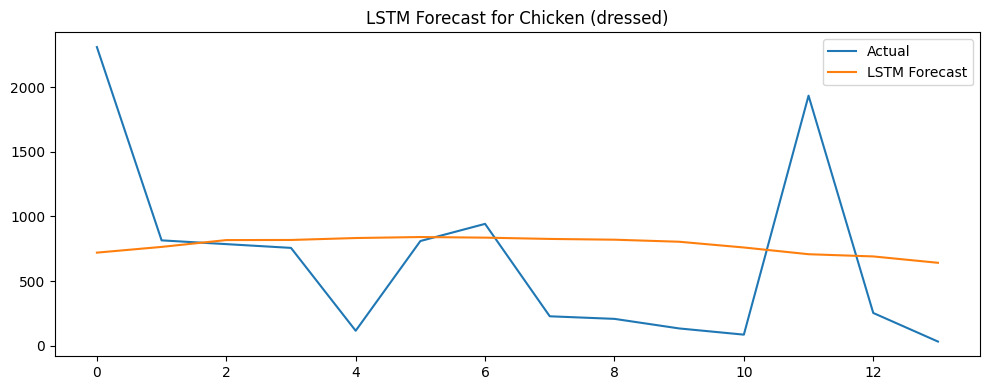

Saved model for Beef (raw) as Beef_raw_lstm_model.h5


['Beef_raw_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Beef (raw): MAPE=0.03%, RMSE=28.41, R^2=-0.51


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Beef (raw)')

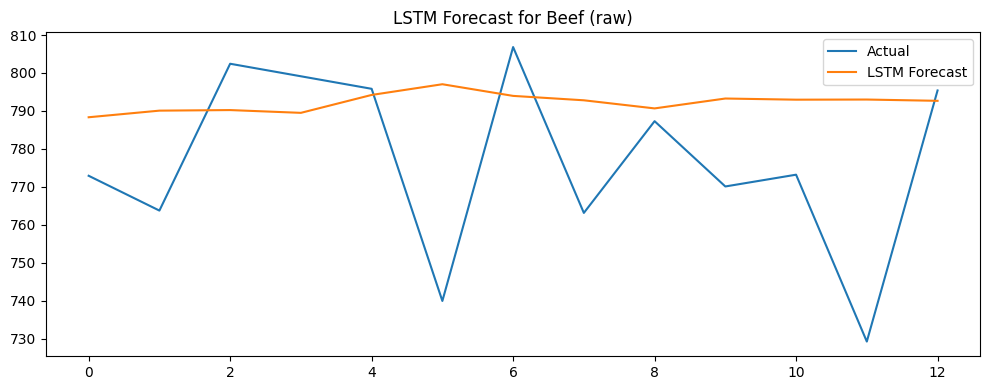

Saved model for Milk (raw) as Milk_raw_lstm_model.h5


['Milk_raw_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Milk (raw): MAPE=0.06%, RMSE=2.71, R^2=-0.14


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Milk (raw)')

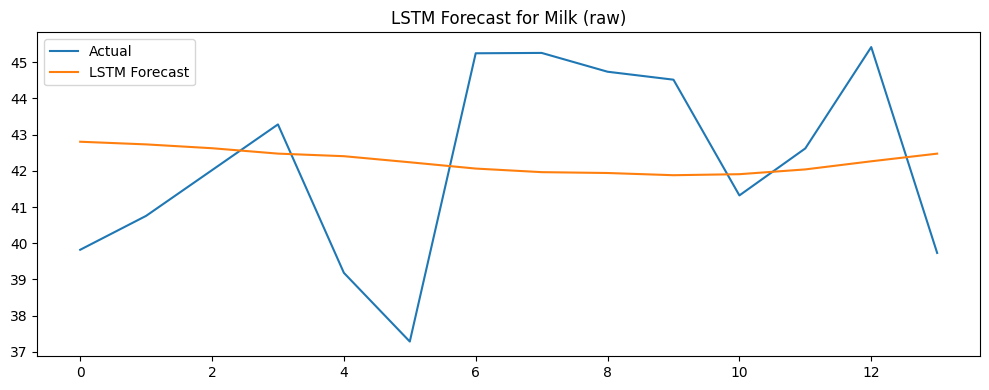

Saved model for Onion (red) as Onion_red_lstm_model.h5


['Onion_red_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Onion (red): MAPE=1.49%, RMSE=607.95, R^2=-0.46


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Onion (red)')

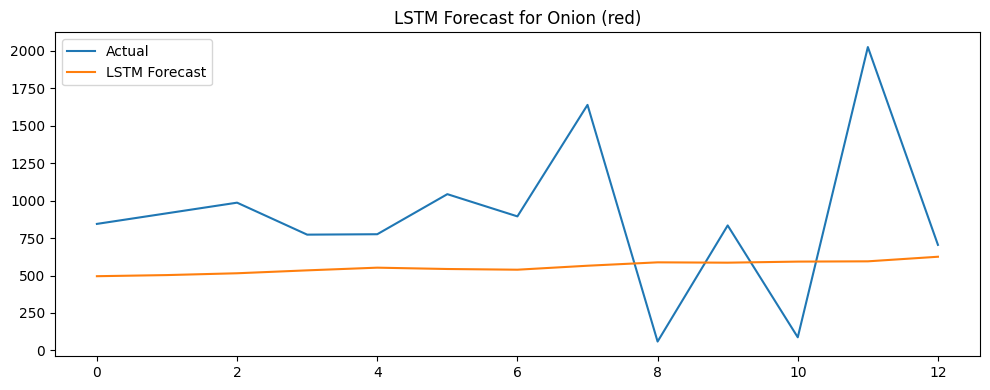

Saved model for Green pepper as Green_pepper_lstm_model.h5


['Green_pepper_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Green pepper: MAPE=1.83%, RMSE=652.34, R^2=-0.13


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Green pepper')

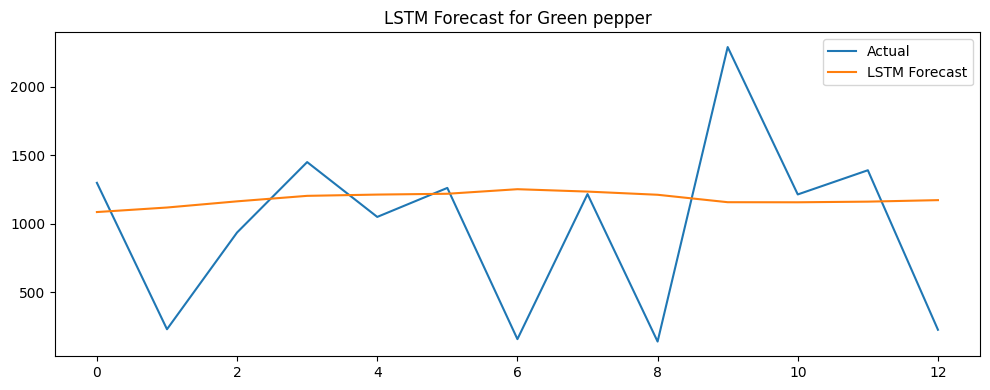

Saved model for Barley as Barley_lstm_model.h5


['Barley_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
Barley: MAPE=0.04%, RMSE=64.37, R^2=-0.76


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Barley')

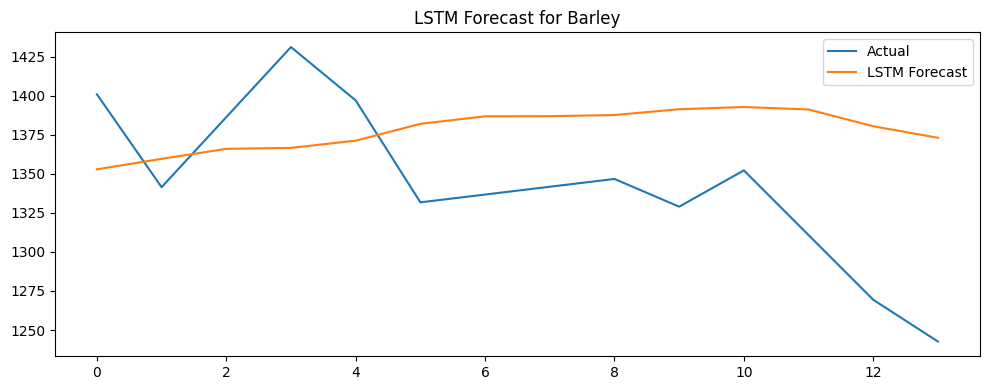

Saved model for Rice (imported) as Rice_imported_lstm_model.h5


['Rice_imported_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Rice (imported): MAPE=0.07%, RMSE=193.01, R^2=-1.01


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Rice (imported)')

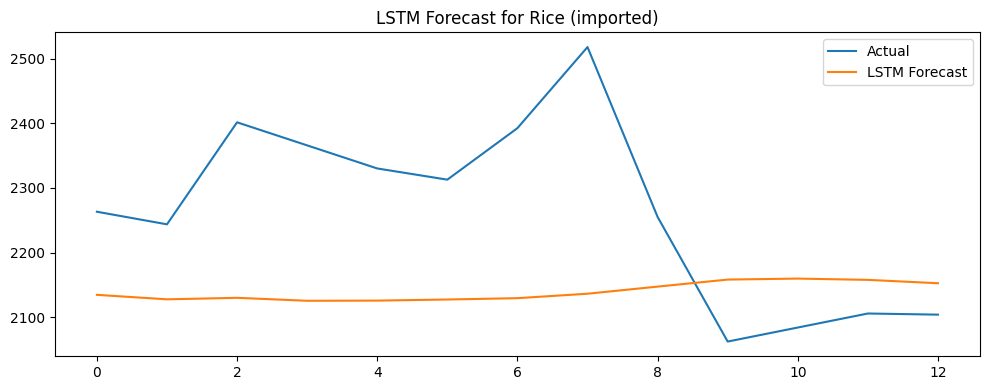

Saved model for Tea (local) as Tea_local_lstm_model.h5


['Tea_local_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Tea (local): MAPE=1.65%, RMSE=701.89, R^2=-0.83


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Tea (local)')

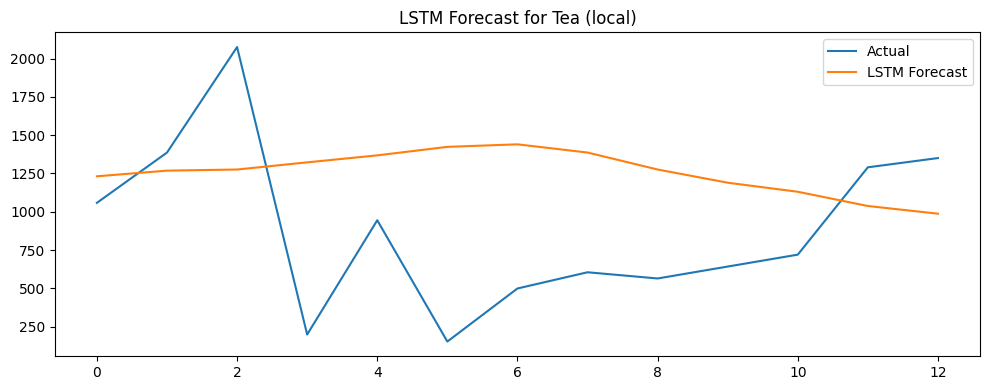

Saved model for Cheese (Ayib) as Cheese_Ayib_lstm_model.h5


['Cheese_Ayib_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Cheese (Ayib): MAPE=2.69%, RMSE=798.00, R^2=-0.15


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Cheese (Ayib)')

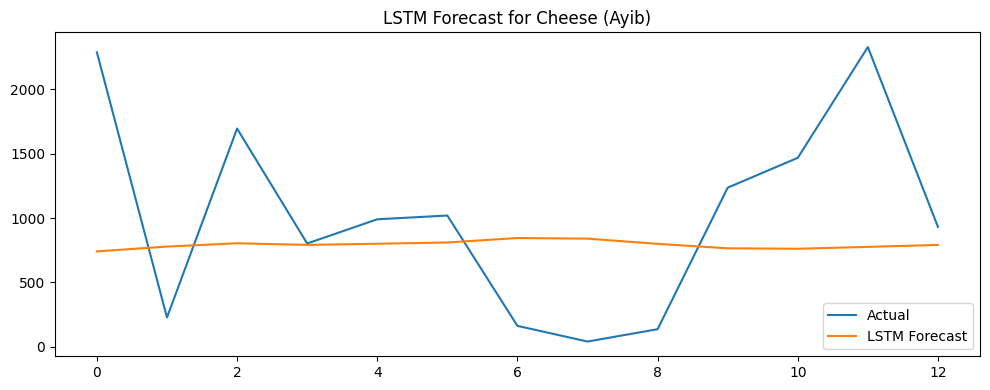

Saved model for Maize as Maize_lstm_model.h5


['Maize_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
Maize: MAPE=0.14%, RMSE=131.02, R^2=-0.16


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Maize')

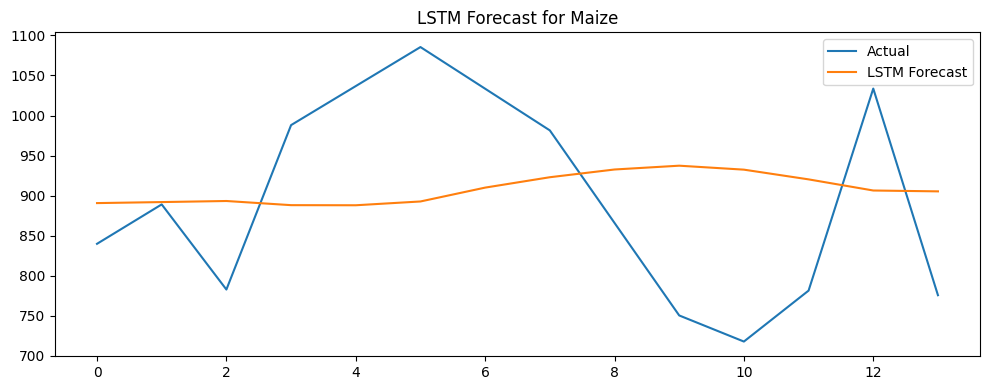

Saved model for Butter (traditional) as Butter_traditional_lstm_model.h5


['Butter_traditional_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Butter (traditional): MAPE=5.71%, RMSE=968.75, R^2=-1.71


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Butter (traditional)')

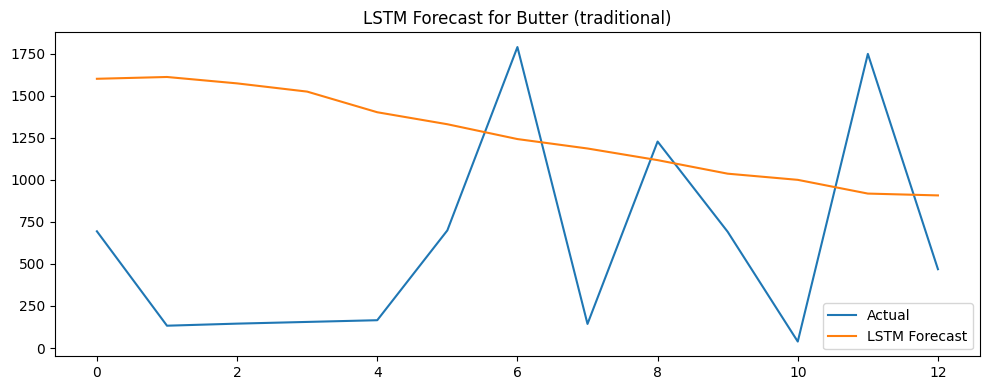

Saved model for Lettuce as Lettuce_lstm_model.h5


['Lettuce_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
Lettuce: MAPE=1.73%, RMSE=603.31, R^2=-0.33


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Lettuce')

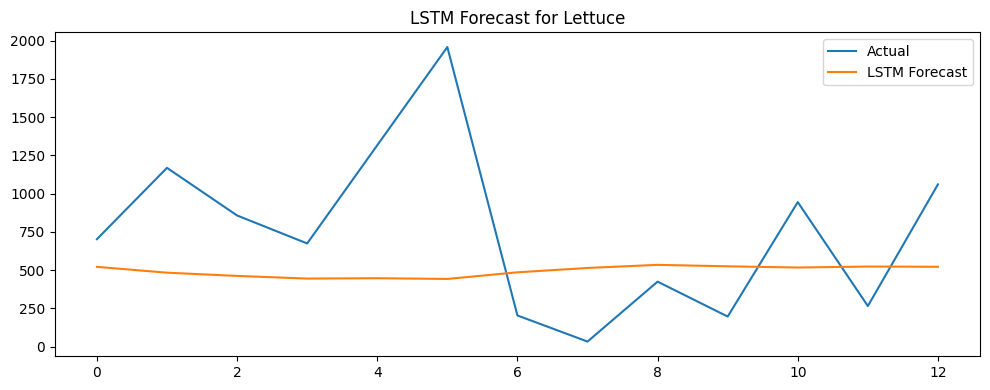

Saved model for Beetroot as Beetroot_lstm_model.h5


['Beetroot_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Beetroot: MAPE=0.75%, RMSE=605.65, R^2=-0.05


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Beetroot')

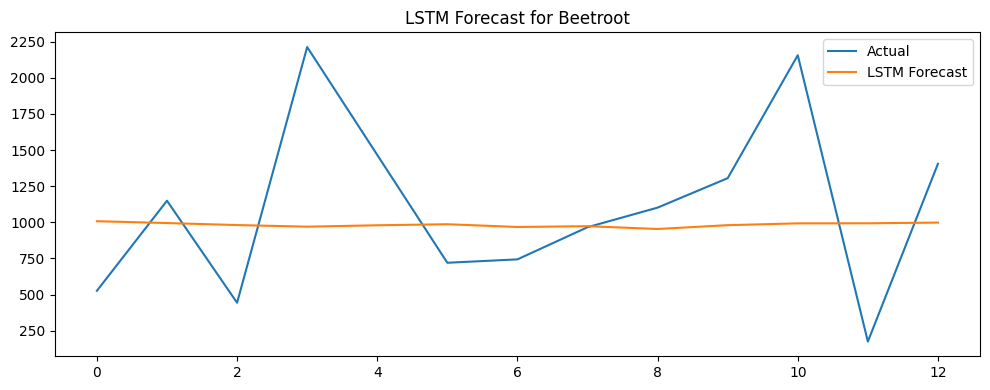

Saved model for Teff (white) as Teff_white_lstm_model.h5


['Teff_white_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Teff (white): MAPE=0.04%, RMSE=101.85, R^2=-0.38


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Teff (white)')

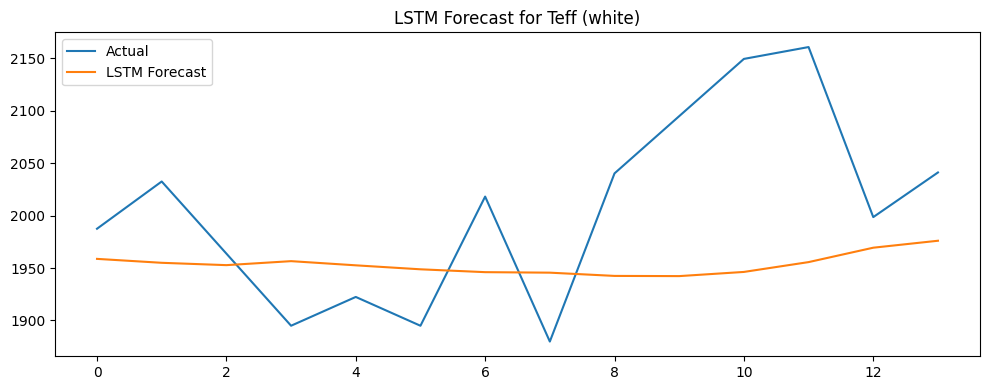

Saved model for Papaya as Papaya_lstm_model.h5


['Papaya_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Papaya: MAPE=4.38%, RMSE=783.24, R^2=-0.37


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Papaya')

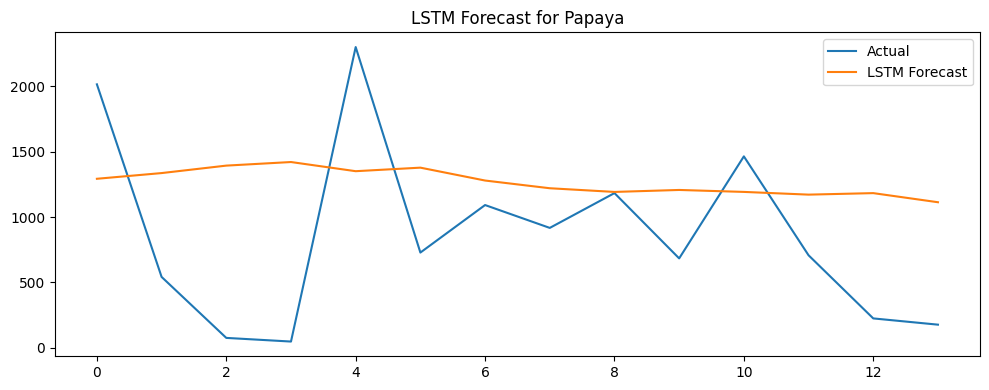

Saved model for Cooking oil (palm) as Cooking_oil_palm_lstm_model.h5


['Cooking_oil_palm_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Cooking oil (palm): MAPE=1.70%, RMSE=640.04, R^2=0.03


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Cooking oil (palm)')

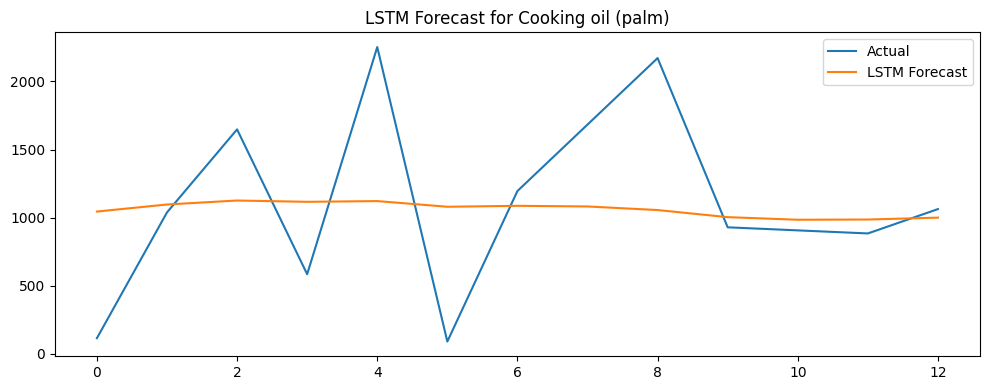

Saved model for Chicken (live) as Chicken_live_lstm_model.h5


['Chicken_live_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
Chicken (live): MAPE=0.09%, RMSE=39.31, R^2=-0.15


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Chicken (live)')

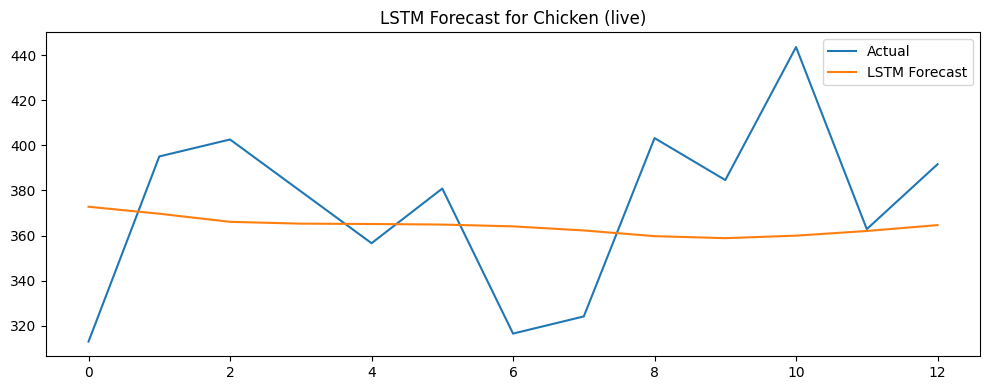

Saved model for Apple (local) as Apple_local_lstm_model.h5


['Apple_local_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Apple (local): MAPE=0.49%, RMSE=509.22, R^2=-0.01


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Apple (local)')

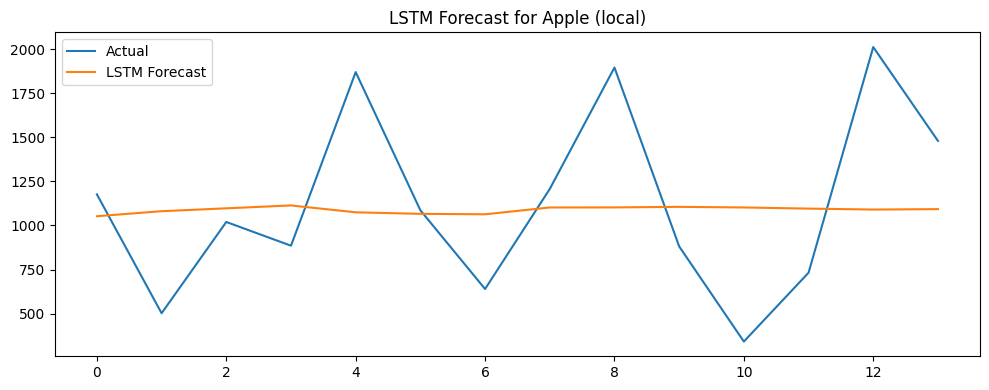

Saved model for Banana as Banana_lstm_model.h5


['Banana_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
Banana: MAPE=3.75%, RMSE=738.44, R^2=-0.14


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Banana')

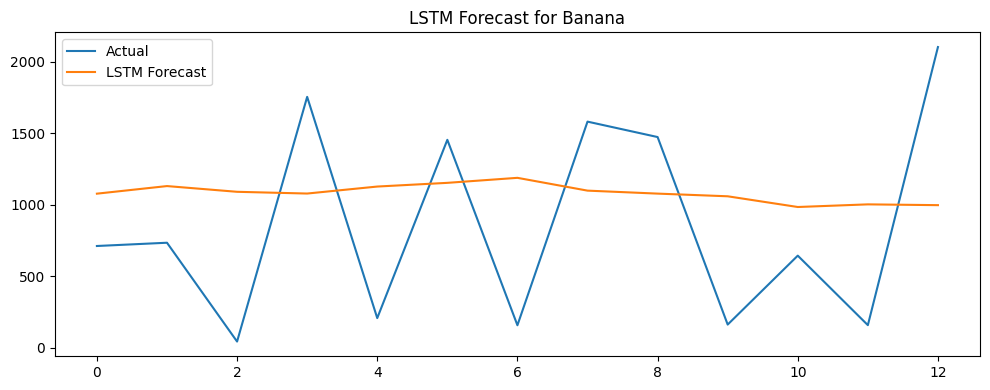

Saved model for Mango as Mango_lstm_model.h5


['Mango_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
Mango: MAPE=3.33%, RMSE=648.57, R^2=-0.02


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Mango')

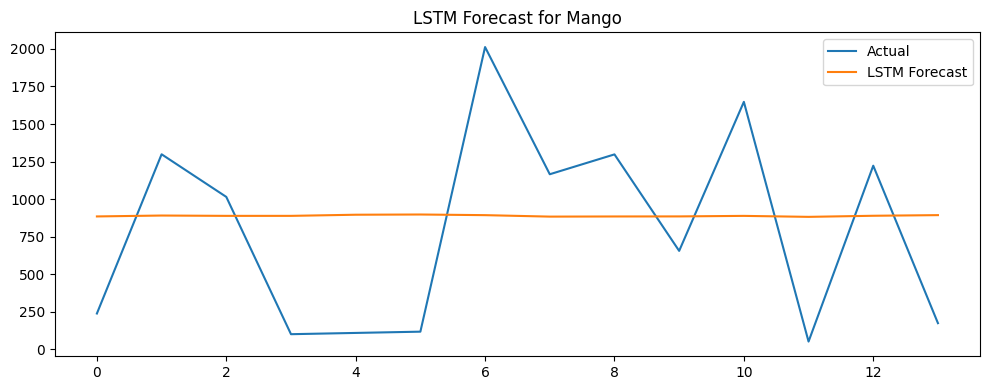

Saved model for Shiro as Shiro_lstm_model.h5


['Shiro_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Shiro: MAPE=1.30%, RMSE=541.71, R^2=-0.15


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Shiro')

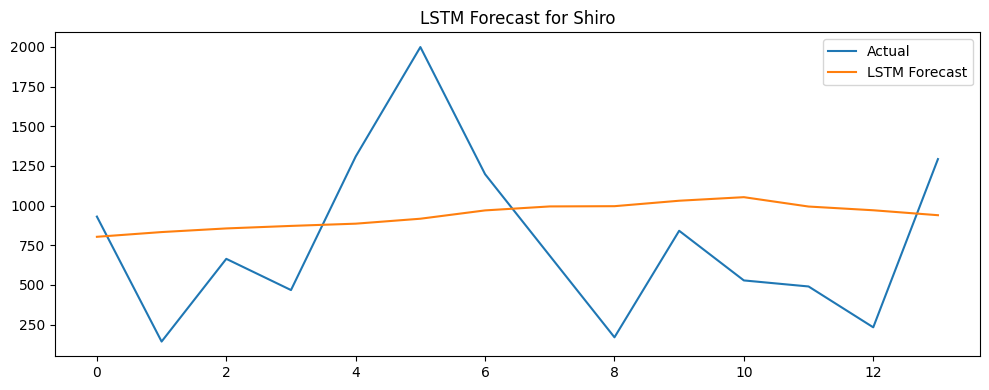

Saved model for Carrot as Carrot_lstm_model.h5


['Carrot_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Carrot: MAPE=0.93%, RMSE=537.88, R^2=-0.00


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Carrot')

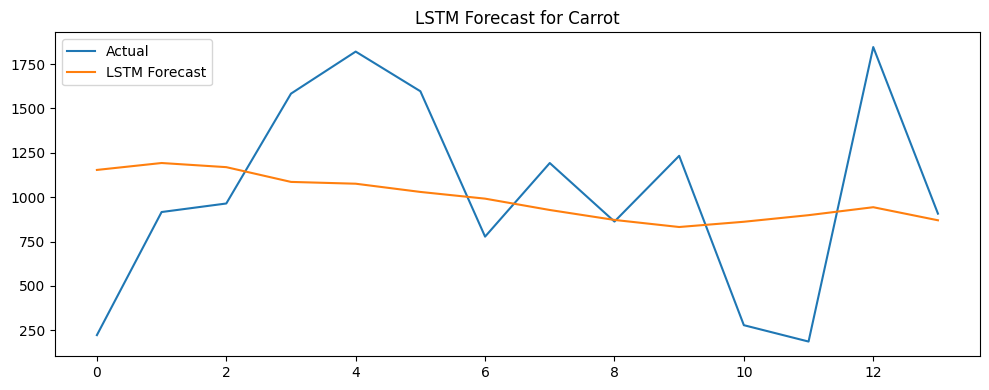

Saved model for Yogurt as Yogurt_lstm_model.h5


['Yogurt_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
Yogurt: MAPE=1.06%, RMSE=465.41, R^2=0.02


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Yogurt')

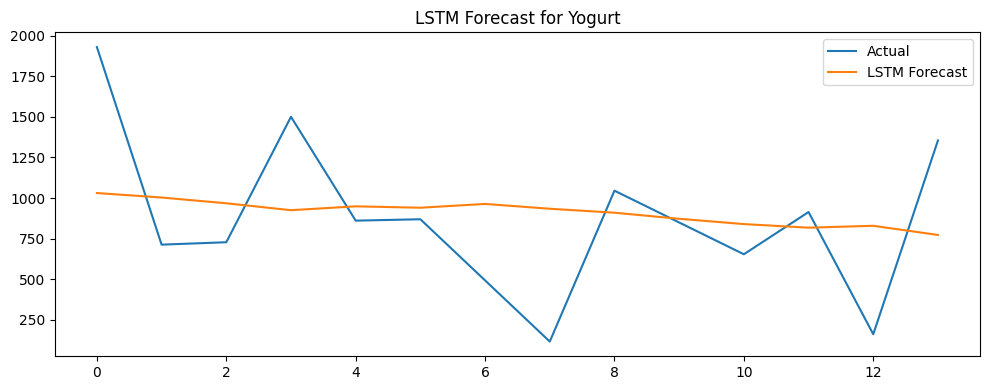

Saved model for Lentils as Lentils_lstm_model.h5


['Lentils_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Lentils: MAPE=1.19%, RMSE=722.17, R^2=-0.21


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Lentils')

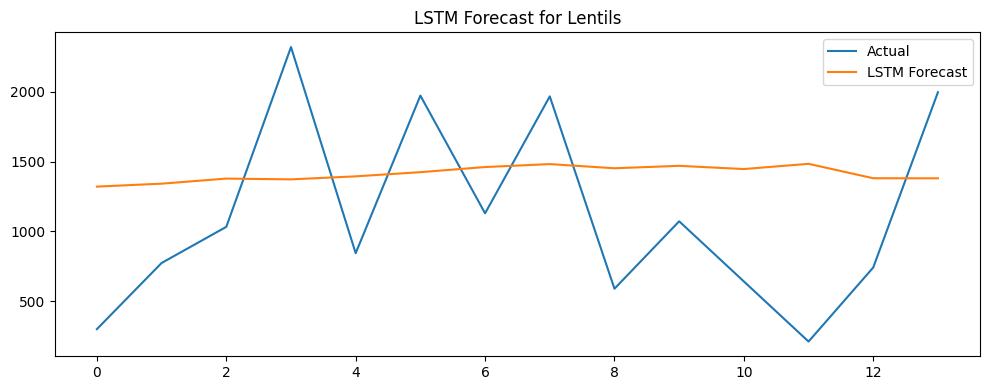

Saved model for Spices mix as Spices_mix_lstm_model.h5


['Spices_mix_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Spices mix: MAPE=2.14%, RMSE=615.98, R^2=-0.02


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Spices mix')

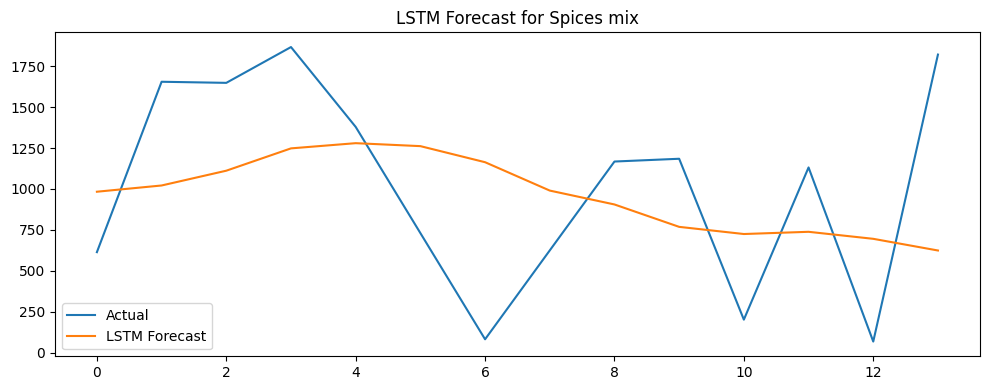

Saved model for Orange as Orange_lstm_model.h5


['Orange_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Orange: MAPE=2.17%, RMSE=730.53, R^2=-0.07


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Orange')

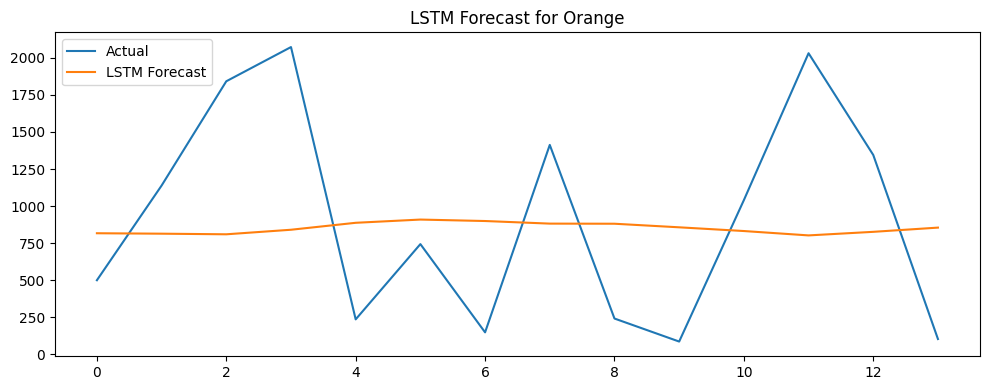

Saved model for Lemon as Lemon_lstm_model.h5


['Lemon_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Lemon: MAPE=0.90%, RMSE=539.30, R^2=-0.23


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Lemon')

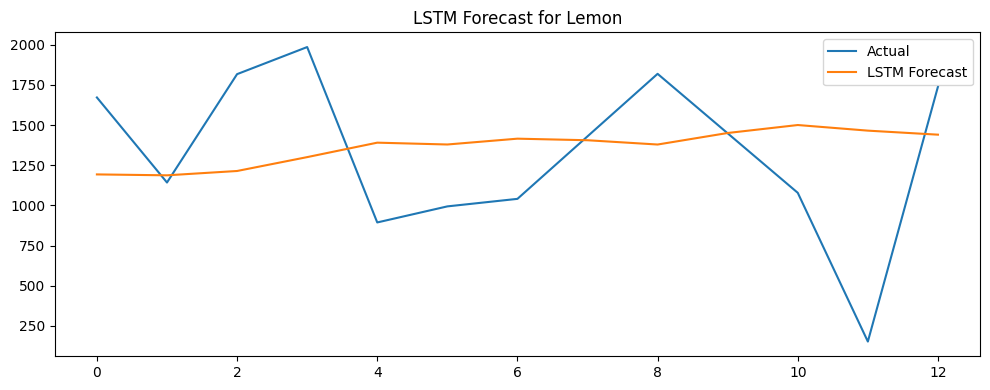

Saved model for Salt as Salt_lstm_model.h5


['Salt_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Salt: MAPE=1.29%, RMSE=649.02, R^2=-0.10


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Salt')

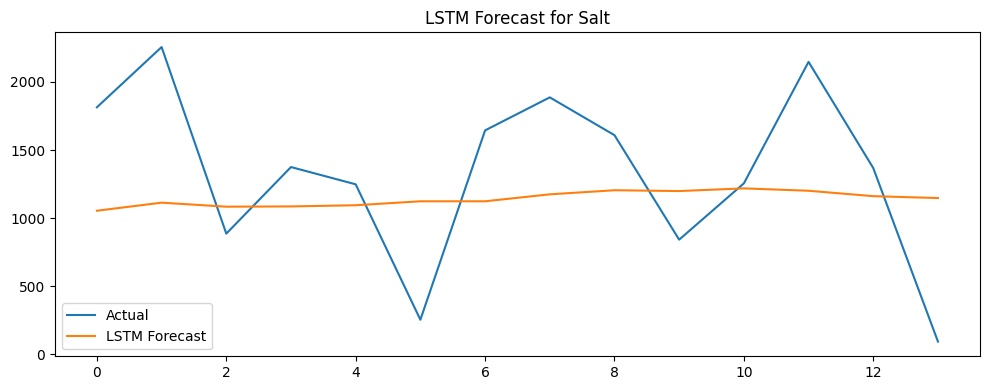

Saved model for Guava as Guava_lstm_model.h5


['Guava_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Guava: MAPE=0.90%, RMSE=959.36, R^2=-2.36


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Guava')

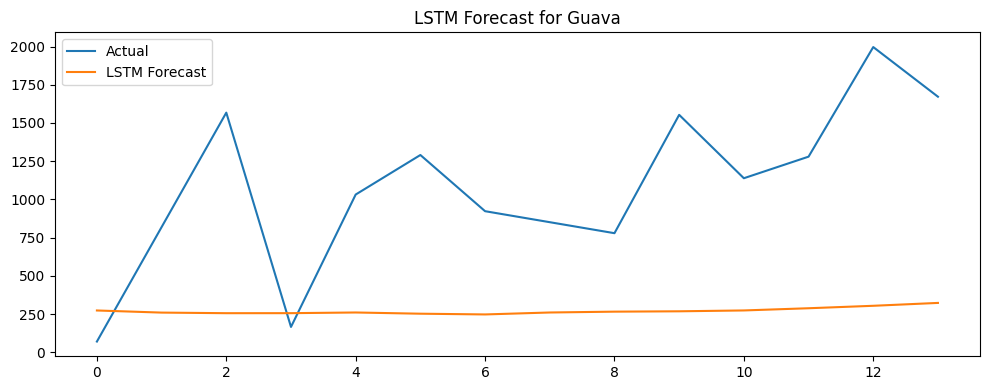

Saved model for Eggs as Eggs_lstm_model.h5


['Eggs_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Eggs: MAPE=0.06%, RMSE=0.64, R^2=-0.50


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Eggs')

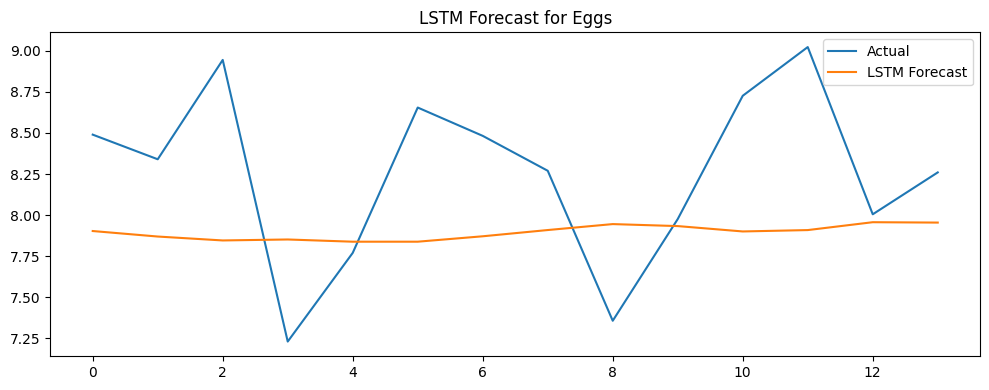

Saved model for Powdered milk as Powdered_milk_lstm_model.h5


['Powdered_milk_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
Powdered milk: MAPE=1.78%, RMSE=524.64, R^2=-0.18


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Powdered milk')

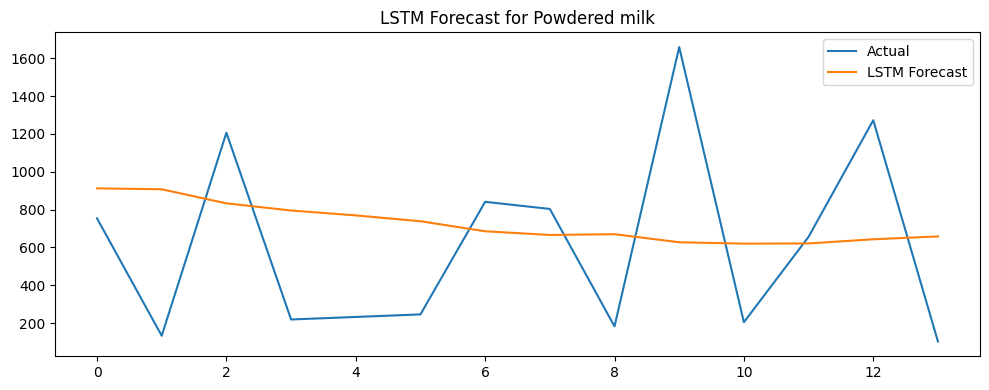

Saved model for Kale (Gomen) as Kale_Gomen_lstm_model.h5


['Kale_Gomen_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Kale (Gomen): MAPE=1.61%, RMSE=625.54, R^2=-0.07


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Kale (Gomen)')

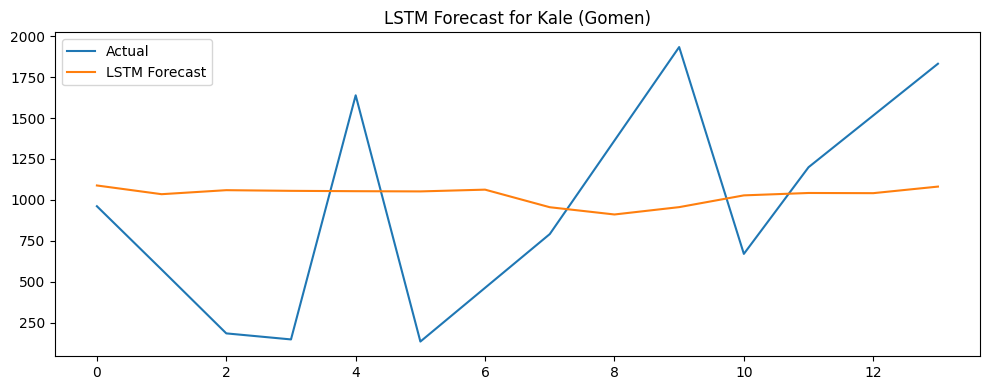

Saved model for Flour (wheat) as Flour_wheat_lstm_model.h5


['Flour_wheat_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Flour (wheat): MAPE=1.23%, RMSE=809.07, R^2=-0.49


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Flour (wheat)')

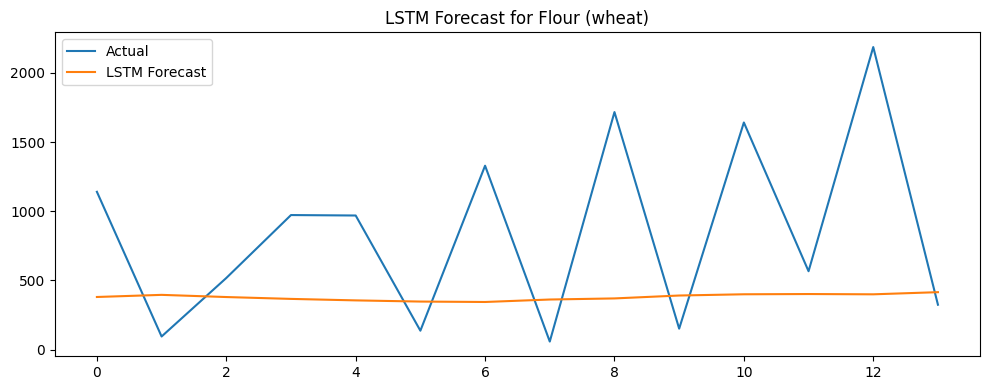

Saved model for Pepper powder as Pepper_powder_lstm_model.h5


['Pepper_powder_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Pepper powder: MAPE=1.84%, RMSE=863.67, R^2=-0.12


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Pepper powder')

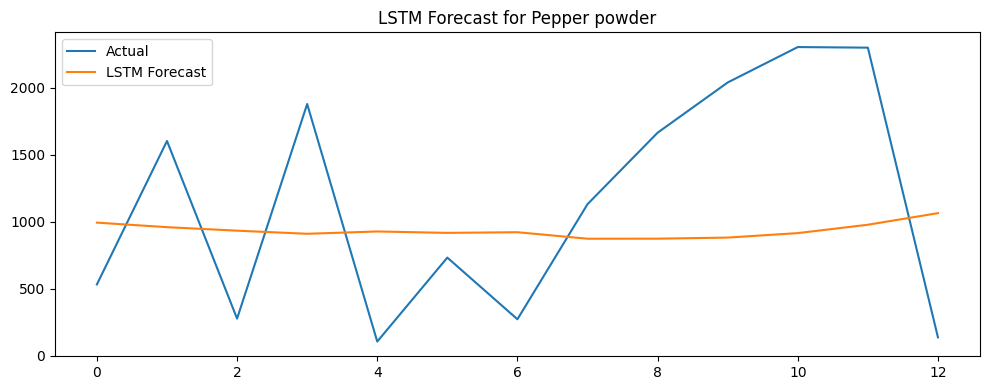

Saved model for Wheat as Wheat_lstm_model.h5


['Wheat_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Wheat: MAPE=0.06%, RMSE=81.05, R^2=-0.11


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Wheat')

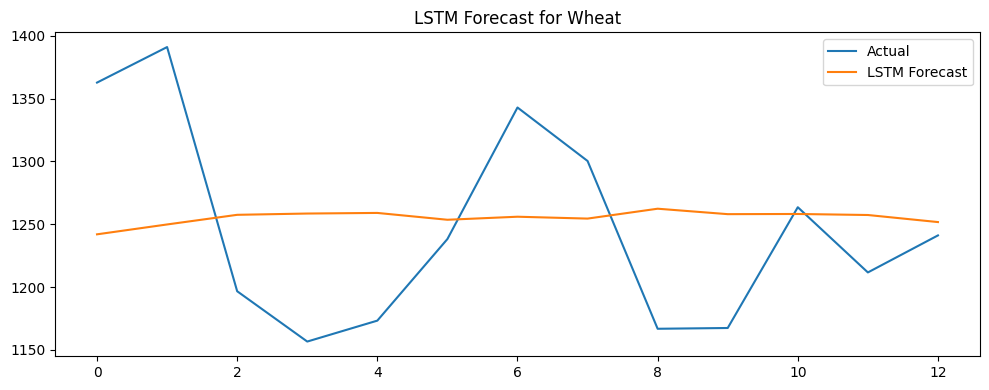

Saved model for Teff (red) as Teff_red_lstm_model.h5


['Teff_red_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Teff (red): MAPE=0.04%, RMSE=104.21, R^2=0.05


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Teff (red)')

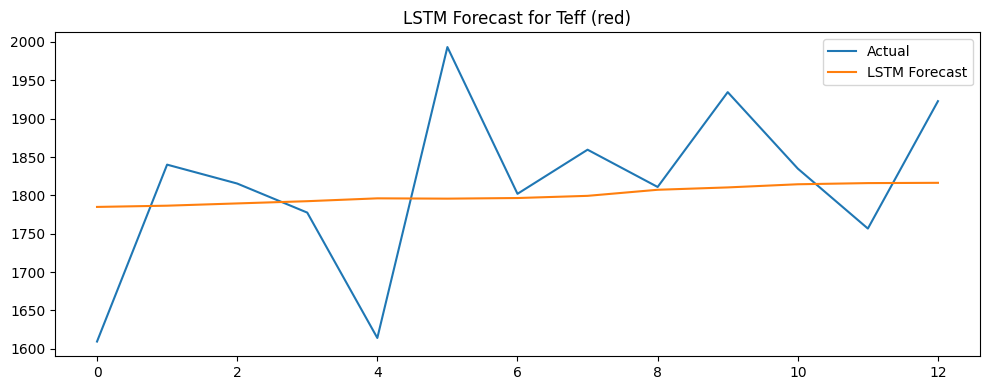

Saved model for Tomato as Tomato_lstm_model.h5


['Tomato_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Tomato: MAPE=2.16%, RMSE=704.95, R^2=-0.34


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Tomato')

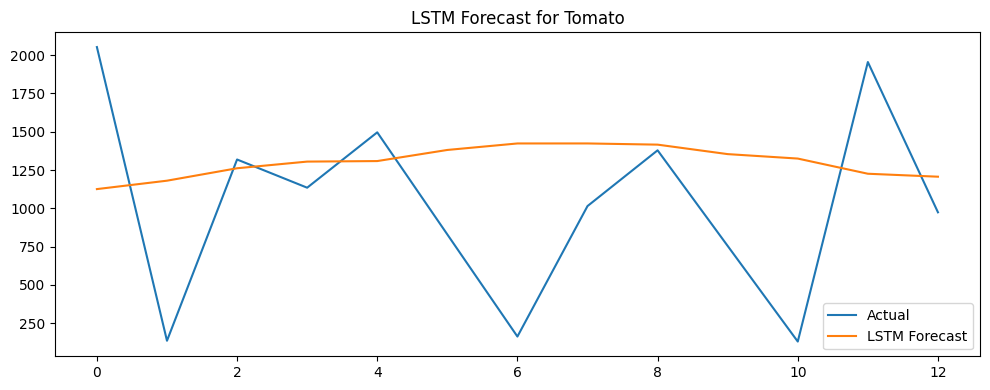

Saved model for Coffee (roasted) as Coffee_roasted_lstm_model.h5


['Coffee_roasted_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Coffee (roasted): MAPE=1.61%, RMSE=636.55, R^2=-0.30


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Coffee (roasted)')

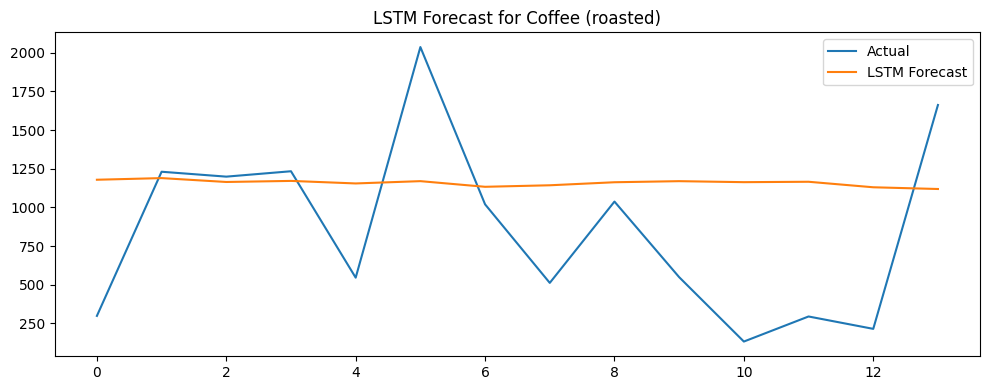

Saved model for Avocado as Avocado_lstm_model.h5


['Avocado_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Avocado: MAPE=1.39%, RMSE=812.58, R^2=-0.30


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Avocado')

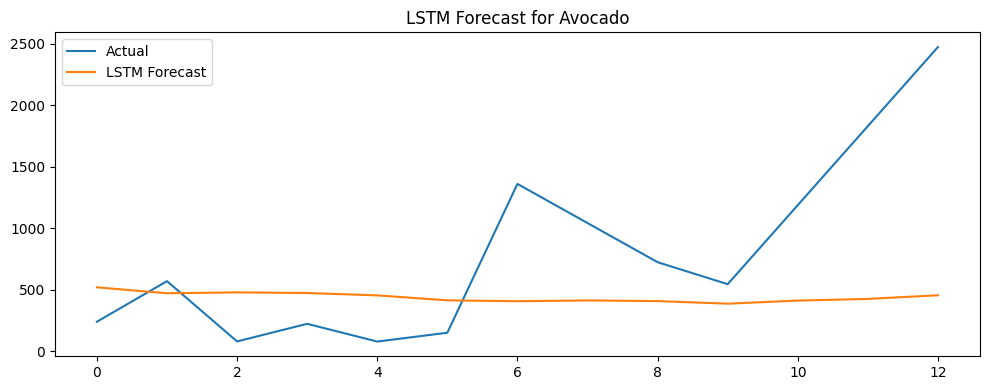

Saved model for Oats as Oats_lstm_model.h5


['Oats_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Oats: MAPE=1.08%, RMSE=633.05, R^2=-0.13


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Oats')

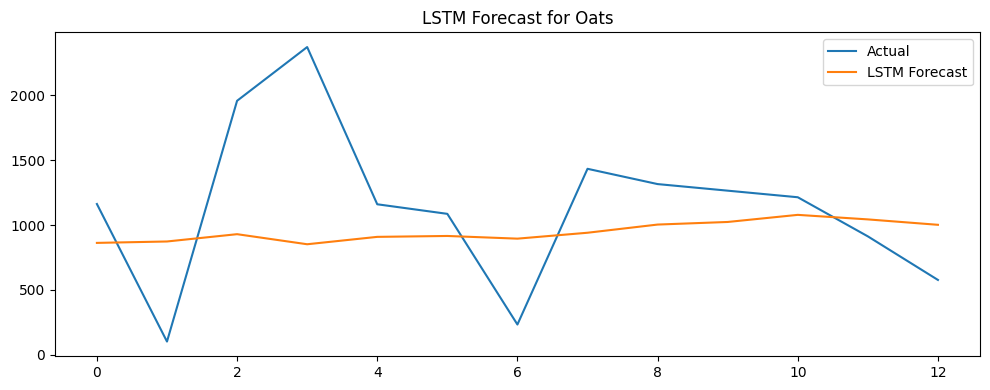

Saved model for Mutton as Mutton_lstm_model.h5


['Mutton_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Mutton: MAPE=2.98%, RMSE=850.32, R^2=-0.14


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Mutton')

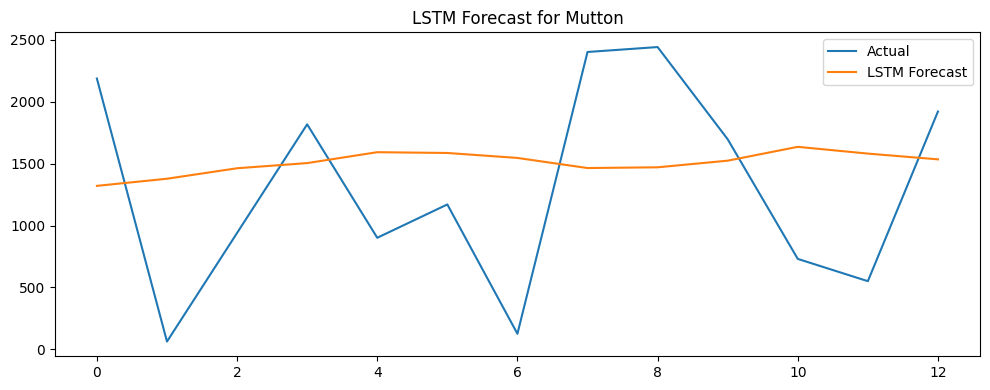

Saved model for Roasted grains as Roasted_grains_lstm_model.h5


['Roasted_grains_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Roasted grains: MAPE=0.81%, RMSE=657.10, R^2=-0.59


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Roasted grains')

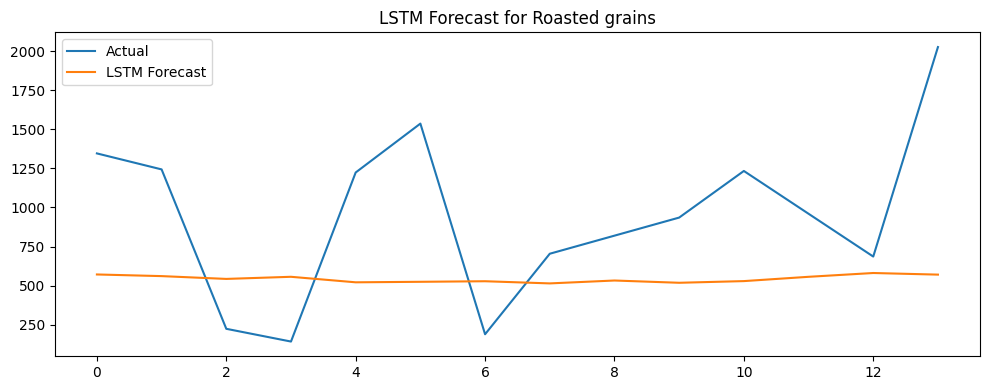

Saved model for Potato as Potato_lstm_model.h5


['Potato_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Potato: MAPE=4.07%, RMSE=878.43, R^2=-0.53


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Potato')

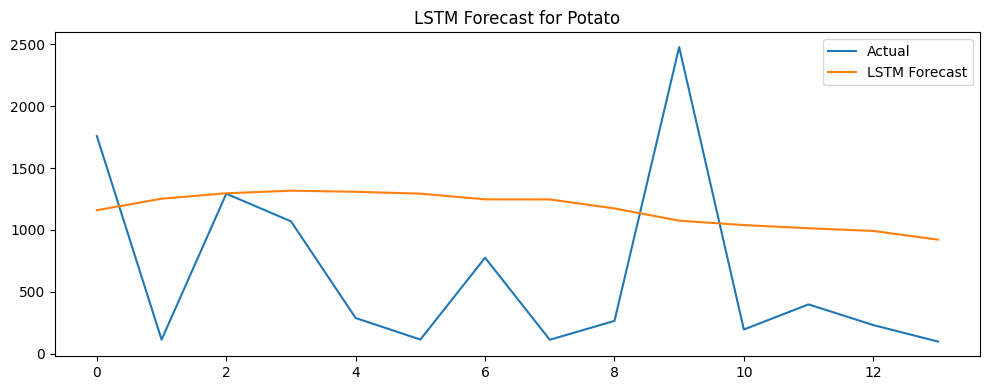

Saved model for Watermelon as Watermelon_lstm_model.h5


['Watermelon_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
Watermelon: MAPE=1.75%, RMSE=688.00, R^2=-0.29


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Watermelon')

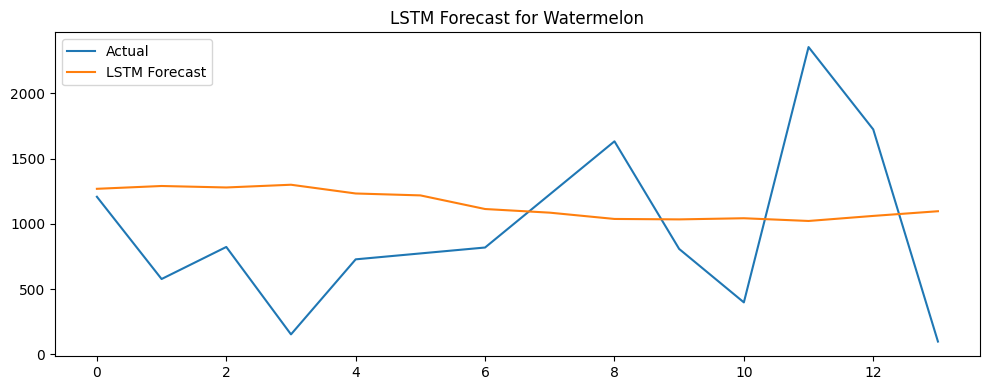

Saved model for Margarine as Margarine_lstm_model.h5


['Margarine_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Margarine: MAPE=1.51%, RMSE=678.12, R^2=-0.15


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Margarine')

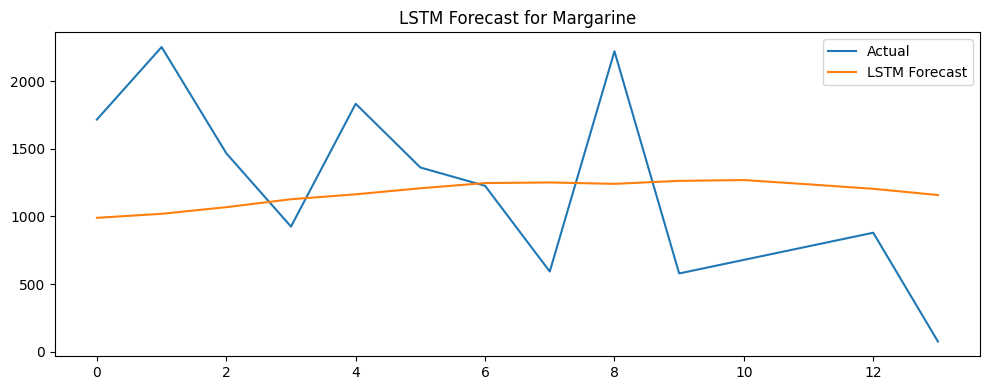

Saved model for Spaghetti as Spaghetti_lstm_model.h5


['Spaghetti_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Spaghetti: MAPE=0.61%, RMSE=655.16, R^2=-0.43


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Spaghetti')

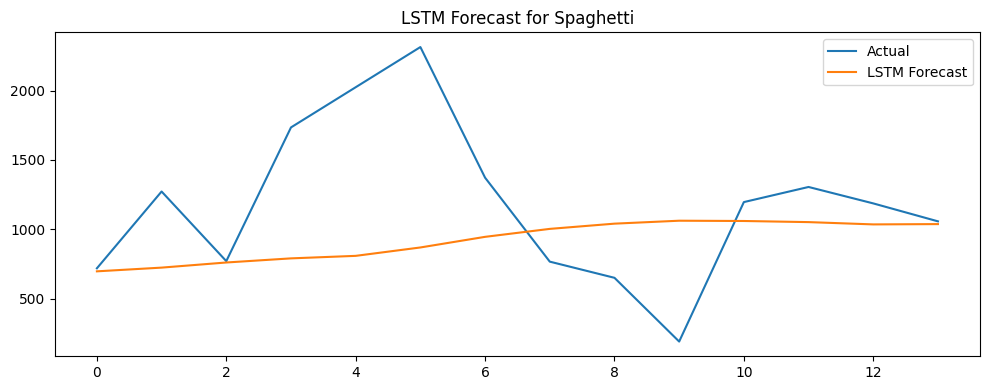

Saved model for Macaroni as Macaroni_lstm_model.h5


['Macaroni_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Macaroni: MAPE=1.63%, RMSE=762.17, R^2=-0.05


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Macaroni')

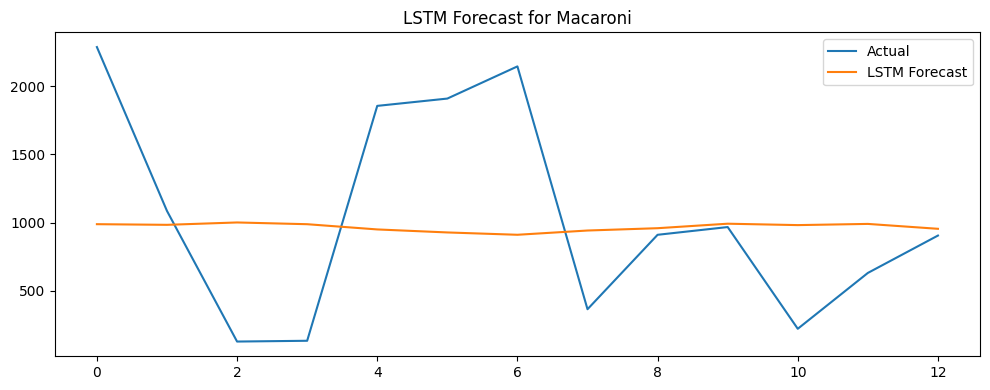

Saved model for Honey as Honey_lstm_model.h5


['Honey_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Honey: MAPE=0.71%, RMSE=771.72, R^2=-1.12


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Honey')

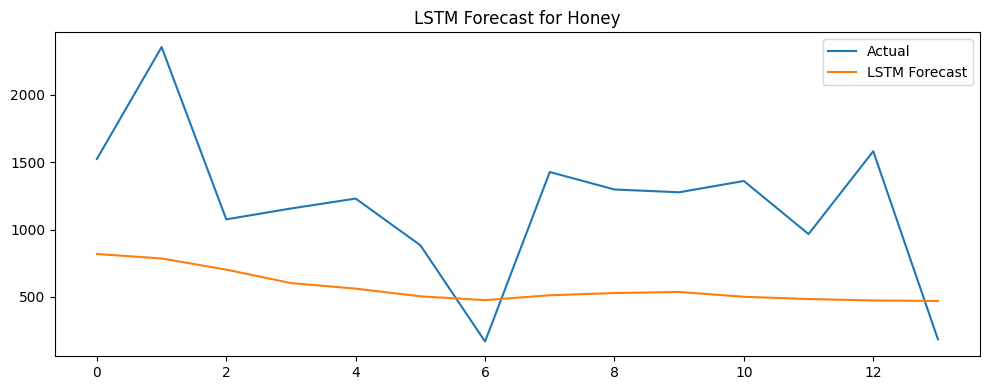

Saved model for Rice (local) as Rice_local_lstm_model.h5


['Rice_local_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Rice (local): MAPE=0.07%, RMSE=139.75, R^2=-0.24


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Rice (local)')

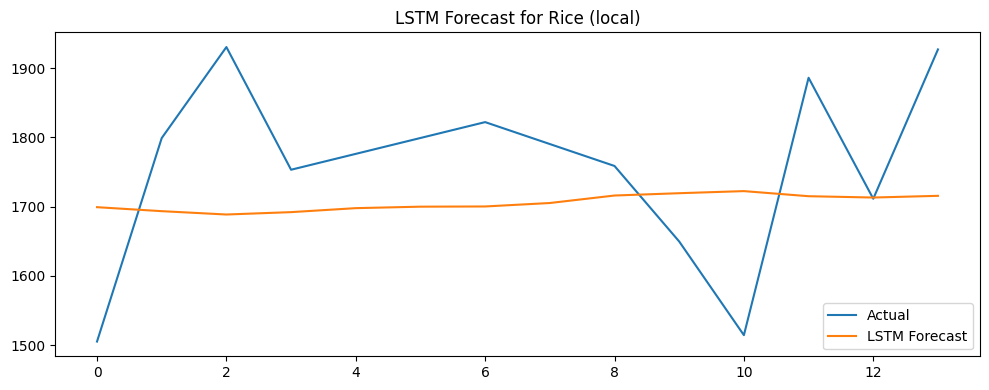

Saved model for Chickpeas as Chickpeas_lstm_model.h5


['Chickpeas_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Chickpeas: MAPE=1.01%, RMSE=684.00, R^2=-0.21


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Chickpeas')

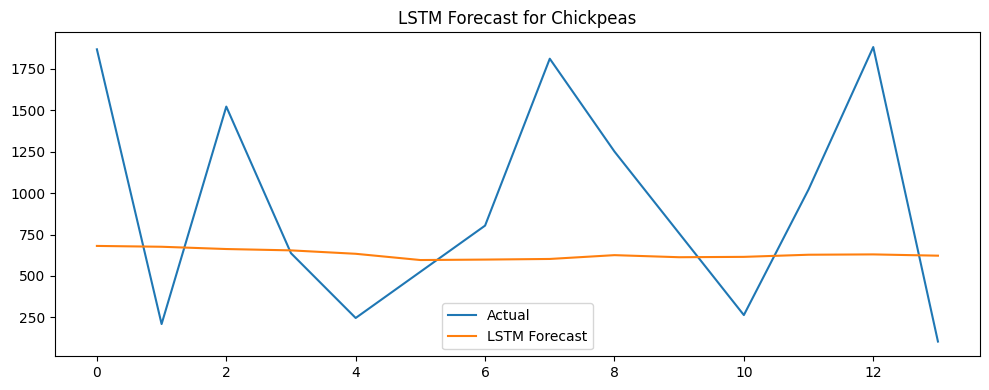

Saved model for Goat meat as Goat_meat_lstm_model.h5


['Goat_meat_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Goat meat: MAPE=0.73%, RMSE=720.04, R^2=-1.31


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Goat meat')

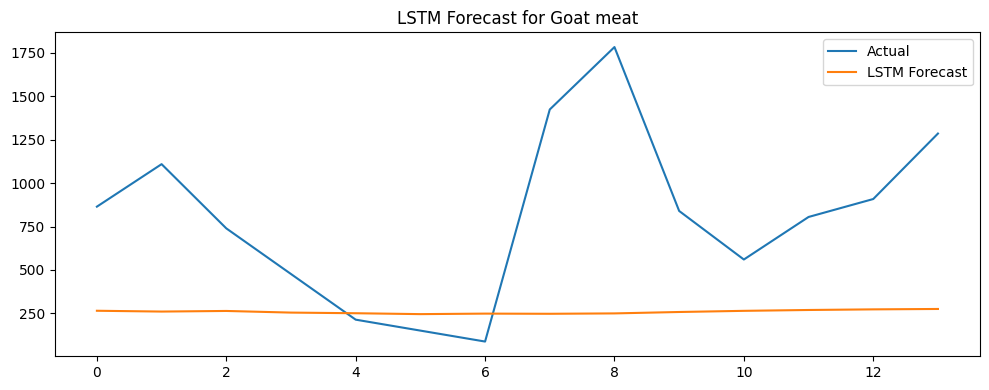

Saved model for Sorghum as Sorghum_lstm_model.h5


['Sorghum_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
Sorghum: MAPE=0.07%, RMSE=108.90, R^2=-0.38


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Sorghum')

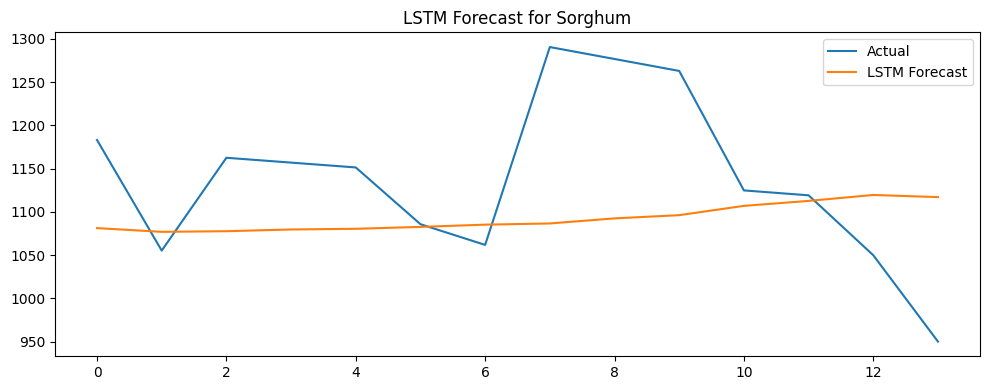

Saved model for Dry peas as Dry_peas_lstm_model.h5


['Dry_peas_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
Dry peas: MAPE=1.01%, RMSE=472.44, R^2=0.03


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Dry peas')

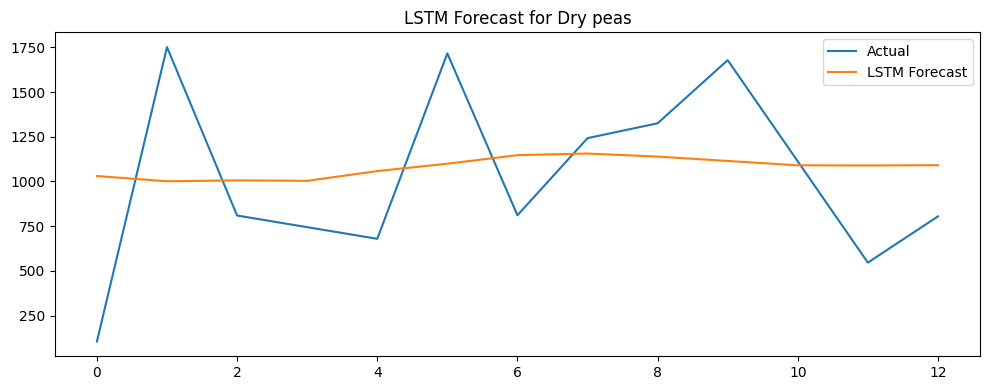

Saved model for Grapes as Grapes_lstm_model.h5


['Grapes_scaler.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Grapes: MAPE=1.99%, RMSE=857.45, R^2=-0.24


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'LSTM Forecast for Grapes')

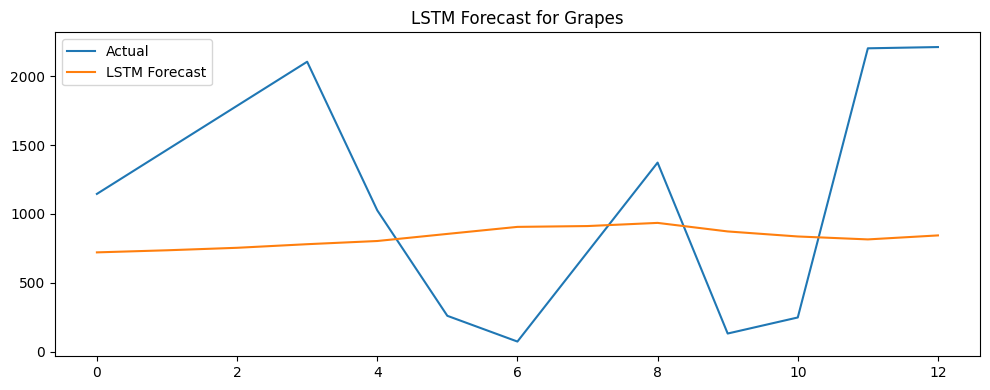

In [ ]:
file_path = "Data/bazarya_price_data.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])

products = data['product'].unique()

for product in products:
    X, y, scaler = load_series(data, product)
    if len(X) < 50:
        continue

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = build_lstm((X_train.shape[1], 1))
    callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]
    model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=callbacks, verbose=0)

    model_name = product.replace(" ", "_").replace("(", "").replace(")", "") + "_lstm_model.h5"
    model.save(model_name)
    print(f"Saved model for {product} as {model_name}")
    joblib.dump(scaler, f"{model_name.replace('_lstm_model.h5', '')}_scaler.pkl")

    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    mape = mean_absolute_percentage_error(y_test_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
    r2 = r2_score(y_test_true, y_pred)

    print(f"{product}: MAPE={mape:.2f}%, RMSE={rmse:.2f}, R^2={r2:.2f}")

    last_window = X[-1].flatten()
    future = forecast_lstm(model, last_window, steps=12, scaler=scaler)

    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y_test_true)), y_test_true, label='Actual')
    plt.plot(np.arange(len(y_pred)), y_pred, label='LSTM Forecast')
    plt.title(f"LSTM Forecast for {product}")
    plt.legend()
    plt.tight_layout()
    plt.show()